# WordNet

In [1]:
from nltk.corpus import wordnet as wn

def get_hypernyms(synset):
    current_node = synset
    while True:
        print(current_node)
        hypernym = current_node.hypernyms()
        if len(hypernym) == 0:
            break
        current_node = hypernym[0]

In [2]:
get_hypernyms(wn.synsets('policeman')[0])

Synset('policeman.n.01')
Synset('lawman.n.01')
Synset('defender.n.01')
Synset('preserver.n.03')
Synset('person.n.01')
Synset('causal_agent.n.01')
Synset('physical_entity.n.01')
Synset('entity.n.01')


In [3]:
get_hypernyms(wn.synsets('firefighter')[0])

Synset('fireman.n.04')
Synset('defender.n.01')
Synset('preserver.n.03')
Synset('person.n.01')
Synset('causal_agent.n.01')
Synset('physical_entity.n.01')
Synset('entity.n.01')


In [4]:
get_hypernyms(wn.synsets('sheriff')[0])

Synset('sheriff.n.01')
Synset('lawman.n.01')
Synset('defender.n.01')
Synset('preserver.n.03')
Synset('person.n.01')
Synset('causal_agent.n.01')
Synset('physical_entity.n.01')
Synset('entity.n.01')


In [5]:
get_hypernyms(wn.synsets('mailman')[0])

Synset('mailman.n.01')
Synset('deliveryman.n.01')
Synset('employee.n.01')
Synset('worker.n.01')
Synset('person.n.01')
Synset('causal_agent.n.01')
Synset('physical_entity.n.01')
Synset('entity.n.01')


# TF-IDF

In [6]:
def get_term_frequency(document, word_dict=None):
    if word_dict is None:
        word_dict = {}
    words = document.split()

    for w in words:
        word_dict[w] = 1 + (0 if word_dict.get(w) is None else word_dict[w])

    return word_dict

In [7]:
def get_document_frequency(documents):
    dicts = []
    vocab = set([])
    df = {}

    for d in documents:
        tf = get_term_frequency(d)
        dicts += [tf]
        vocab = vocab | set(tf.keys())
    
    for v in list(vocab):
        df[v] = 0
        for dict_d in dicts:
            if dict_d.get(v) is not None:
                df[v] += 1

    return df

In [8]:
doc1 = '''
지능 지수 라는 말 들 어 보 셨 을 겁니다 . 여러분 의 지성 을 일컫 는 말 이 죠 . 그런데 심리 지수 란 건 뭘까요 ? 사람 들 이 특정 한 식 으로 행동 하 는 이유 에 대해 여러분 은 얼마나 알 고 계시 나요 ? 또 타인 이나 심지어 여러분 의 행동 을 예측 하 는 일 은 얼마나 잘 하 시 나요 ? 또 , 심리학 에 대해 갖춘 지식 중 에서 어느 정도 나 잘못 된 것 일까요 ? 심리학 에 관한 열 가지 신화 를 통해 잘못 된 것 들 을 알아보 도록 하 죠 . 여러분 은 한 번 쯤 들 어 보 셨 을 법 한 것 은 자신 들 의 심리학 에 대해 고려 할 때 , 거의 항상 남자 는 화성 에서 왔 고 , 여자 는 금성 에서 온 것 같 다고 합니다 . 하지만 실제로 남자 와 여자 는 얼마나 다른 걸까요 ? 이 를 알아보 기 위해 , 일단 남녀 사이 에 확실 하 게 차이 나 는 것 을 살펴보 고 심리학 적 인 성별 간 의 차이점 을 동일 한 척도 상 에서 대비 해 보 도록 하 겠 습니다 . 남자 와 여자 간 에 실제로 차이 나 는 능력 중 하나 는 그 들 이 공 을 얼마나 멀리 던질 수 있 느냐 하 는 것 입니다 . 여기 남자 들 의 데 이타 를 보 시 면 , 정상 분포 곡선 이 라는 걸 볼 수 있 습니다 . 남자 들 소수 는 정말 멀리 던지 고 , 남자 들 소수 는 멀리 던지 지 못하 지만 , 남자 들 대부분 은 평균 적 인 거리 를 던졌 습니다 . 여자 들 도 역시 비슷 한 분포 상태 를 보입니다 만 사실 남녀 사이 엔 커다란 차이 가 있 습니다 . 사실 , 평균 수준 의 남자 라면 모든 여성 중 대략 98 % 보다 더 멀리 던질 수 있 거든요 . 이 와 동일 하 게 표준 화 된 척도 상 에서 심리학 에서 말 하 는 성별 간 의 차이 를 살펴 봅시다 . 심리학자 라는 여러분 에게 말 하 길 남자 들 의 공간 지각 능력 이 여자 들 보다 뛰어나 다고 할 겁니다 . 예 를 들 어 , 지도 읽 는 능력 같 은 건데 , 맞 는 말 입니다 . 하지만 그 차이 의 정도 를 살펴봅시다 . 아주 작 죠 . 두 선 이 너무 근접 해서 거의 겹칠 정도 입니다 .
'''

doc2 = '''
최상 의 제시 유형 은 학습 자 에 좌우 되 는 것 이 아니 라 학습 해야 할 내용 에 따라 좌우 됩니다 . 예 를 들 어 여러분 이 운전 하 기 를 배울 때 실제로 몸 으로 체감 하 는 경험 없이 누군가 가 어떻게 할 지 이야기 하 는 것 을 듣 는 것 만 으로 배울 수 있 습니까 ? 연립 방정식 을 풀 어야 하 는데 종이 에 쓰 지 않 고 머리 속 에서 말 하 는 것 으로 풀 수 가 있 을까요 ? 또는 만일 여러분 이 체감 형식 의 학습 자 유형 이 라면 , 건축학 시험 을 해석 적 춤 을 이용 하 여 수정 할 수 있 을까요 ? 아니 죠 ! 배워야 할 내용 을 제시 된 유형 에 맞추 어야 합니다 , 당신 에게 맞추 는 게 아니 라요 . 여러분 들 상당수 가 " A " 급 의 우등 생 이 라는 걸 아 는데 , 조만간 중등 학력 인증 시험 ( GCSE ) 결과 를 받 게 되 시 겠 네요 . 그런데 , 만일 , 여러분 들 이 희망 했 던 성적 을 받 지 못하 게 된다 해도 여러분 들 의 학습 방식 을 탓 해서 는 안 되 는 겁니다 . 여러분 이 비난 할 수 있 는 한 가지 는 바로 유전자 입니다 . 이건 최근 에 런던 대학교 ( UCL ) 에서 수행 했 던 연구 결과 는 여러 학생 들 과 그 들 의 중등 학력 인증 시험 결과 사이 의 차이 중 58 % 는 유전 적 인 요인 으로 좁혀졌 습니다 . 매우 정밀 한 수치 처럼 들립니다 . 그러면 어떻게 알 수 있 을까요 ? 유전 적 요인 과 환경 적 요인 의 상대 적 기여 도 를 알 고 싶 을 때 우리 가 사용 할 수 있 는 방식 은 바로 쌍둥이 연구 입니다 . 일 란 성 쌍생아 의 경우 환경 적 요인 과 유전 적 요인 모두 를 100 % 똑같이 공유 하 게 되 지만 이란 성 쌍생아 의 경우 는 100 % 동일 한 환경 을 공유 하 지만 유전자 의 경우 여타 의 형제자매 들 처럼 50 % 만 공유 하 게 됩니다 . 따라서 일 란 성 쌍둥이 와 이란 성 쌍둥이 사이 의 인증 시험 결과 가 얼마나 비슷 한지 비교 해 보 고 여기 에 약간 의 수학 적 계산 을 더하 게 되 면 그 수행 능력 의 차이 중 어느 정도 가 환경 적 요인 의 탓 이 고 어느 정도 가 유전자 탓 인지 를 알 수 있 게 됩니다 .
'''

doc3 = '''
그러나 이 이야기 는 세 가지 이유 로 인해 신화 입니다 . 첫째 , 가장 중요 한 건 실험실 가운 은 흰색 이 아니 라 회색 이 었 다 라는 점 이 죠 . 둘째 , 참 여자 들 은 실험 하 기 전 에 와 참여 자 들 이 걱정 을 표현 할 때 마다 상기 시키 는 말 을 들 었 는데 , 전기 충격 이 고통 스럽 기 는 하 지만 , 치명 적 이 지 는 않 으며 실제로 영구 적 인 손상 을 남기 는 일 은 없 을 거 라는 것 이 었 습니다 . 셋째 , 참 여자 들 은 단지 가운 을 입 은 사람 이 시켜 전기 충격 을 주지 는 않 았 죠 . 실험 이 끝나 고 그 들 의 인터뷰 를 했 을 때 모든 참여 자 들 은 강한 신념 을 밝혔 는데 , ' 학습 과 처벌 ' 연구 가 과학 적 으로 가치 있 는 목적 을 수행 했 기 때문 에 비록 동료 참여 자 들 에게 가해진 순간 적 인 불편 함 에 반해서 과학 을 위해서 오래 남 을 성과 를 얻 을 것 이 라고 말 이 죠 . 그러 다 보 니 제 가 이야기 를 한 지 벌써 12 분 이 되 었 습니다 . 여러분 들 중 에 는 아마 거기 앉 아서 제 이야기 를 들으시는 동안 저 의 말투 와 몸짓 을 분석 하 면서 제 가 말 하 는 어떤 것 을 인지 해야 할까 해결 하 려고 하 셨 을 겁니다 , 제 가 진실 을 이야기 하 는 지 , 또는 거짓말 을 하 고 있 는 것 인지 말 이 죠 . 만일 그러 셨 다면 , 아마 지금 쯤 완전히 실패 하 셨 을 겁니다 . 왜냐하면 우리 모두 가 사람 이 말 하 는 패턴 과 몸짓 으로 도 거짓말 여부 를 알아내 는 것 이 가능 하 다고 생각 하 지만 , 오랜 세월 수백 회 에 걸쳐 행해진 실제 심리 검사 의 결과 를 보 면 우리 들 모두 는 , 심지어 경찰관 이나 탐정 들 을 포함 해서 도 기본 적 으로 몸짓 과 언어 적 패턴 으로 거짓말 을 탐지 하 는 것 은 운 에 맞 길 수 밖 에 는 없 는 것 입니다 . 흥미 롭 게 도 한 가지 예외 가 있 는데요 : 실종 된 친척 을 찾 아 달 라고 호소 하 는 TV 홍보 입니다 .
'''

In [9]:
def get_tfidf(docs, top_k=30):
    vocab = {}
    tfs = []
    for d in docs:
        vocab = get_term_frequency(d, vocab)
        tfs += [get_term_frequency(d)]
    df = get_document_frequency(docs)

    from operator import itemgetter
    import numpy as np
    sorted_vocab = sorted(vocab.items(), key=itemgetter(1), reverse=True)

    stats = []
    for v, freq in sorted_vocab:
        tfidfs = []
        for idx in range(len(docs)):
            if tfs[idx].get(v) is not None:
                tfidfs += [tfs[idx][v] * np.log(len(docs) / df[v])]
            else:
                tfidfs += [0]

        stats += [(v, freq, tfidfs, max(tfidfs))]

    sorted_tfidfs = sorted(stats, key=itemgetter(3), reverse=True)[:top_k]
    for v, freq, tfidfs, max_tfidfs in sorted_tfidfs:
        print('%s\t%d\t%s' % (v, freq, '\t'.join(['%.4f' % tfidfs[i] for i in range(len(docs))])))

In [10]:
get_tfidf([doc1, doc2, doc3])

남자	9	9.8875	0.0000	0.0000
요인	6	0.0000	6.5917	0.0000
심리학	5	5.4931	0.0000	0.0000
멀리	4	4.3944	0.0000	0.0000
시험	4	0.0000	4.3944	0.0000
환경	4	0.0000	4.3944	0.0000
성	4	0.0000	4.3944	0.0000
었	4	0.0000	0.0000	4.3944
제	4	0.0000	0.0000	4.3944
대해	3	3.2958	0.0000	0.0000
나	3	3.2958	0.0000	0.0000
간	3	3.2958	0.0000	0.0000
유형	3	0.0000	3.2958	0.0000
됩니다	3	0.0000	3.2958	0.0000
을까요	3	0.0000	3.2958	0.0000
인증	3	0.0000	3.2958	0.0000
탓	3	0.0000	3.2958	0.0000
유전자	3	0.0000	3.2958	0.0000
유전	3	0.0000	3.2958	0.0000
쌍둥이	3	0.0000	3.2958	0.0000
경우	3	0.0000	3.2958	0.0000
공유	3	0.0000	3.2958	0.0000
참여	3	0.0000	0.0000	3.2958
몸짓	3	0.0000	0.0000	3.2958
거짓말	3	0.0000	0.0000	3.2958
에서	8	2.4328	0.8109	0.0000
지수	2	2.1972	0.0000	0.0000
행동	2	2.1972	0.0000	0.0000
나요	2	2.1972	0.0000	0.0000
또	2	2.1972	0.0000	0.0000


# Term-Frequency Matrix

In [11]:
def get_tf(docs):
    vocab = {}
    tfs = []
    for d in docs:
        vocab = get_term_frequency(d, vocab)
        tfs += [get_term_frequency(d)]

    from operator import itemgetter
    import numpy as np
    sorted_vocab = sorted(vocab.items(), key=itemgetter(1), reverse=True)

    stats = []
    for v, freq in sorted_vocab:
        tf_v = []
        for idx in range(len(docs)):
            if tfs[idx].get(v) is not None:
                tf_v += [tfs[idx][v]]
            else:
                tf_v += [0]

        print('%s\t%d\t%s' % (v, freq, '\t'.join(['%d' % tf for tf in tf_v])))

# Appendix: Tokenization

## How to install Mecab

참고: https://konlpy-ko.readthedocs.io/ko/v0.4.3/install/#installation

### For Ubuntu
```bash
$ sudo apt-get install curl
$ bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
```

### For Mac
```bash
$ bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
```

In [12]:
!mecab -O wakati --input-buffer-size=32000 < ./ted.aligned.ko.refined.txt > ted.aligned.ko.refined.tok.txt

## If you use Ubuntu

```bash
$ cat ./ted.aligned.ko.refined.tok.txt | shuf | head -n 1000000 > ted.aligned.ko.refined.tok.rl-1m.txt
```

## If you use Mac

```bash
$ brew install randomize-lines
$ cat ./ted.aligned.ko.refined.tok.txt | rl | head -n 1000000 > ted.aligned.ko.refined.tok.rl-1m.txt
```

In [43]:
!cat ./ted.aligned.ko.refined.tok.txt | rl | head -n 100000 > ted.aligned.ko.refined.tok.rl-100k.txt

rl: write error: Broken pipe


## For Enghlish Tokenization

참고: http://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.moses

In [8]:
from nltk.tokenize.moses import MosesTokenizer

t = MosesTokenizer()
sent = 'According to \'Ki\' (which is a name of instructor), there are more than 10,000 ways to tokenize a sentence with various languages.'
tokens = t.tokenize(sent, escape=False)

print(sent)
print(' '.join(tokens))

According to 'Ki' (which is a name of instructor), there are more than 10,000 ways to tokenize a sentence with many languages.
According to ' Ki ' ( which is a name of instructor ) , there are more than 10,000 ways to tokenize a sentence with many languages .


# Based on Context Window (Co-occurrence)

In [44]:
def read(fn):
    lines = []
    
    f = open(fn, 'r')
    for line in f:
        if line.strip() != '':
            lines += [line.strip()]
    f.close()
    
    return lines

In [45]:
def get_context_counts(lines, w_size=2):
    co_dict = {}
    for line in lines:
        words = line.split()
        
        for i, w in enumerate(words):
            for c in words[i - w_size:i + w_size]:
                if w != c:
                    co_dict[(w, c)] = 1 + (0 if co_dict.get((w, c)) is None else co_dict[(w, c)])
            
    return co_dict

In [53]:
from operator import itemgetter

fn = 'ted.aligned.ko.refined.tok.rl-100k.txt'
lines = read(fn)
co_dict = get_context_counts(lines)
tfs = get_term_frequency(' '.join(lines))
sorted_tfs = sorted(tfs.items(), key=itemgetter(1), reverse=True)

In [54]:
min_cnt, max_cnt = 10, 100000
context_matrix = []
row_heads = []
col_heads = [w for w, f in sorted_tfs if f >= min_cnt and f<= max_cnt]
for w, f in sorted_tfs:
    row = []
    if f >= min_cnt and f <= max_cnt:
        row_heads += [w]
        for w_, f_ in sorted_tfs:
            if f_ >= min_cnt and f_ <= max_cnt:
                if co_dict.get((w, w_)) is not None:
                    row += [co_dict[(w, w_)]]
                else:
                    row += [0]
        context_matrix += [row]

import pandas as pd

p = pd.DataFrame(data=context_matrix, index=row_heads, columns=col_heads)

In [55]:
p

,는,이,을,은,하,의,에,",",들,있,...,다다를,유리병,엉터리,켠,기념관,외침,스프롤,이야,금성,악상어
는,0,4227,3554,320,13174,1324,6800,4049,315,8655,...,0,1,0,1,0,0,0,0,2,3
이,8466,0,706,3342,494,3450,1423,2797,12935,4470,...,1,0,0,0,0,1,1,0,1,0
을,5496,3031,0,3064,2249,5075,1875,1119,6720,1783,...,0,1,2,1,2,2,0,1,1,0
은,3298,2764,394,0,40,1994,442,2514,9052,59,...,0,2,2,0,0,0,1,0,3,0
하,13364,2407,9382,717,0,112,1945,700,232,336,...,0,0,0,0,0,0,0,0,0,0
의,3289,1965,295,2386,29,0,409,1858,3699,21,...,0,1,1,0,0,6,3,1,2,3
에,5965,2431,625,1574,391,2945,0,1935,1299,3145,...,7,7,0,5,3,1,1,0,0,2
",",2053,2858,969,1541,2899,675,1305,0,1297,1932,...,0,1,1,1,2,0,0,1,2,0
들,3958,13284,6696,10531,23,5851,1447,2311,0,16,...,0,0,3,0,0,1,0,4,0,0
있,8674,4684,2692,169,2997,20,3802,71,932,0,...,3,0,0,0,0,0,0,0,0,0


## Plotting Feature Vectors

In [56]:
import urllib.request

FONT_URL = 'https://cdn.rawgit.com/spoqa/spoqa-han-sans/01ff0283/Subset/SpoqaHanSans/SpoqaHanSansRegular.ttf'

urllib.request.urlretrieve(FONT_URL, 'SpoqaHanSansRegular.ttf')

('SpoqaHanSansRegular.ttf', <http.client.HTTPMessage at 0x1a2b476470>)

In [60]:
def visualize(dataframe, n_points, min_count):
    import matplotlib.pyplot as plt
    import matplotlib.font_manager as fm
    import numpy as np
    from sklearn.manifold import TSNE
        
    tokens = (dataframe.sum(axis=1) > min_count).index
    tokens = np.random.choice(tokens, n_points, replace=False)
    
    tsne = TSNE(n_components=2, random_state=0)
    results = tsne.fit_transform(dataframe.loc[tokens, tokens].values)
    
    font = fm.FontProperties(fname='SpoqaHanSansRegular.ttf', size=16)
    
    plt.figure(figsize=(15, 15))
    for i, query in enumerate(tokens):
        x, y = results[i]
        plt.scatter(x, y, label=query)
        
        # Prevent label overlapping by applying random offsets.
        offset_x = np.random.randint(-350, 120) / 1000
        offset_y = np.random.randint(-300, 150) / 1000
        
        plt.annotate(query, (x + offset_x, y + offset_y), fontproperties=font)
        
    plt.show()

/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


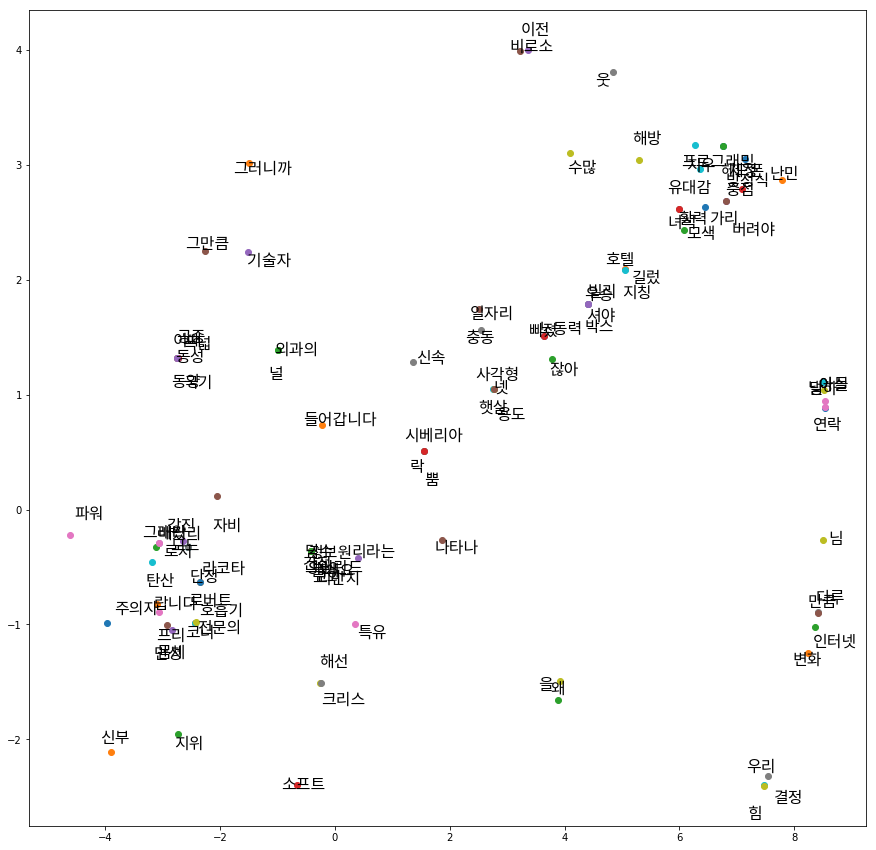

In [63]:
visualize(p, 100, 10)

# Similarity Measures

In [22]:
import torch

$$
\text{d}_{\text{L1}}(w,v)=\sum_{i=1}^d{|w_i-v_i|},\text{ where }w,v\in\mathbb{R}^d.
$$

In [23]:
def get_l1_distance(x1, x2):
    return ((x1 - x2).abs()).sum()**.5

$$
\text{d}_{\text{L2}}(w,v)=\sqrt{\sum_{i=1}^d{(w_i-v_i)^2}},\text{ where }w,v\in\mathbb{R}^d.
$$

In [24]:
def get_l2_distance(x1, x2):
    return ((x1 - x2)**2).sum()**.5

$$
d_{\infty}(w,v)=\max(|w_1-v_1|,|w_2-v_2|,\cdots,|w_d-v_d|),\text{ where }w,v\in\mathbb{R}^d
$$

In [25]:
def get_infinity_distance(x1, x2):
    return ((x1 - x2).abs()).max()

$$
\begin{aligned}
\text{sim}_{\text{cos}}(w,v)&=\overbrace{\frac{w\cdot v}{|w||v|}}^{\text{dot product}}
=\overbrace{\frac{w}{|w|}}^{\text{unit vector}}\cdot\frac{v}{|v|} \\
&=\frac{\sum_{i=1}^{d}{w_iv_i}}{\sqrt{\sum_{i=1}^d{w_i^2}}\sqrt{\sum_{i=1}^d{v_i^2}}} \\
\text{where }&w,v\in\mathbb{R}^d
\end{aligned}
$$

In [26]:
def get_cosine_similarity(x1, x2):
    return (x1 * x2).sum() / ((x1**2).sum()**.5 * (x2**2).sum()**.5)

$$
\begin{aligned}
\text{sim}_{\text{jaccard}}(w,v)&=\frac{|w \cap v|}{|w \cup v|} \\
&=\frac{|w \cap v|}{|w|+|v|-|w \cap v|} \\
&\approx\frac{\sum_{i=1}^d{\min(w_i,v_i)}}{\sum_{i=1}^d{\max(w_i,v_i)}} \\
\text{where }&w,v\in\mathbb{R}^d.
\end{aligned}
$$

In [27]:
def get_jaccard_similarity(x1, x2):
    return torch.stack([x1, x2]).min(dim=0)[0].sum() / torch.stack([x1, x2]).max(dim=1)[0].sum()

In [28]:
def get_nearest(query, dataframe, metric, top_k, ascending=True):
    vector = torch.FloatTensor(dataframe.loc[query].values)
    distances = dataframe.apply(lambda x: metric(vector, torch.FloatTensor(x.values)), axis=1)
    top_distances = distances.sort_values(ascending=ascending)[:top_k]

    print(', '.join([f'{k} ({v:.1f})' for k, v in top_distances.items()]))

In [29]:
print('L1 distance:')
get_nearest('우리', p, get_l1_distance, 30)
print('\nL2 distance:')
get_nearest('우리', p, get_l2_distance, 30)
print('\nInfinity distance:')
get_nearest('우리', p, get_infinity_distance, 30)
print('\nCosine similarity:')
get_nearest('우리', p, get_cosine_similarity, 30, ascending=False)
print('\nJaccard similarity:')
get_nearest('우리', p, get_jaccard_similarity, 30, ascending=False)

L1 distance:
우리 (0.0), 저 (45.3), 제 (47.9), 여러분 (51.7), 이것 (53.3), 그것 (53.4), 그 (55.3), 당신 (55.3), 자신 (55.4), 문제 (55.9), 저희 (56.1), 요 (56.2), 여기 (56.3), 다 (56.3), 이야기 (56.3), 이런 (56.4), 아닙니다 (56.4), 세계 (56.4), 나 (56.4), 하지만 (56.5), 그녀 (56.5), 곳 (56.5), 그리고 (56.6), 어떻게 (56.6), 어떤 (56.6), 하나 (56.6), 기술 (56.7), ' (56.7), 모든 (56.8), 아이 (56.8)

L2 distance:
우리 (0.0), 저 (436.4), 제 (466.3), 에서 (528.4), 그 (558.5), 한 (577.9), 여러분 (613.3), 과 (615.4), 없 (626.2), 로 (628.1), 일 (629.9), 문제 (637.2), 를 (639.7), 모든 (644.6), 나 (651.4), 그것 (654.1), 이것 (654.4), " (655.2), 와 (655.8), 이런 (657.3), 다른 (658.0), 저희 (660.7), 데 (661.4), 하나 (661.9), 에게 (663.0), 년 (663.8), 거 (664.4), 아 (666.7), 내 (667.8), 모두 (667.8)

Infinity distance:
우리 (0.0), 한 (292.0), 되 (294.0), 에 (296.0), 를 (315.0), 없 (321.0), 의 (328.0), 에서 (372.0), 그 (372.0), 으로 (377.0), 일 (388.0), " (392.0), 에게 (393.0), 도 (395.0), 과 (399.0), 저 (400.0), 제 (401.0), 모든 (402.0), 주 (404.0), 거 (405.0), 로 (406.0), 겁니다 (410.0), 데 (411.0), 와 (415.0), 방법 (416.0), 저희 (

# Thesaurus Based Method: Lesk Algorithm

In [30]:
from nltk.corpus import wordnet as wn
for ss in wn.synsets('bass'):
    print(ss, ss.definition())

Synset('bass.n.01') the lowest part of the musical range
Synset('bass.n.02') the lowest part in polyphonic music
Synset('bass.n.03') an adult male singer with the lowest voice
Synset('sea_bass.n.01') the lean flesh of a saltwater fish of the family Serranidae
Synset('freshwater_bass.n.01') any of various North American freshwater fish with lean flesh (especially of the genus Micropterus)
Synset('bass.n.06') the lowest adult male singing voice
Synset('bass.n.07') the member with the lowest range of a family of musical instruments
Synset('bass.n.08') nontechnical name for any of numerous edible marine and freshwater spiny-finned fishes
Synset('bass.s.01') having or denoting a low vocal or instrumental range


In [31]:
def lesk(sentence, word):
    from nltk.wsd import lesk

    best_synset = lesk(sentence.split(), word)
    print(best_synset, best_synset.definition())

In [32]:
sentence = 'I went fishing last weekend and I got a bass and cooked it'
word = 'bass'
lesk(sentence, word)

Synset('sea_bass.n.01') the lean flesh of a saltwater fish of the family Serranidae


In [33]:
sentence = 'I love the music from the speaker which has strong beat and bass'
word = 'bass'
lesk(sentence, word)

Synset('bass.n.02') the lowest part in polyphonic music


In [34]:
sentence = 'I think the bass is more important than guitar'
word = 'bass'
lesk(sentence, word)

Synset('sea_bass.n.01') the lean flesh of a saltwater fish of the family Serranidae


# Similarity Based Method [Erk et al.2007]

In [35]:
from konlpy.tag import Mecab

def count_seen_headwords(lines, predicate='VV', headword='NNG'):
    mecab = Mecab()
    seen_dict = {}
    
    for line in lines:
        pos_result = mecab.pos(line)
        
        word_h = None
        word_p = None
        for word, pos in pos_result:
            if pos == predicate or pos[:3] == predicate + '+':
                word_p = word
                break
            if pos == headword:
                word_h = word
        
        if word_h is not None and word_p is not None:
            seen_dict[word_p] = [word_h] + ([] if seen_dict.get(word_p) is None else seen_dict[word_p])
            
    return seen_dict

$$
(w,h,R),\text{ where }R\text{ is a relationship, such as verb-object}.
$$

$$
A_R(w,h_0)=\sum_{h\in\text{Seen}_R(w)}{\text{sim}(h_0,h)\cdot \phi_R(w,h)}
$$

In [36]:
def get_selectional_association(predicate, headword, lines, dataframe, metric):
    v1 = torch.FloatTensor(dataframe.loc[headword].values)
    seens = count_seen_headwords(lines)[predicate]
    
    total = 0
    for seen in seens:
        try:
            v2 = torch.FloatTensor(dataframe.loc[seen].values)
            total += metric(v1, v2)
        except:
            pass
        
    return total

In [39]:
def wsd(predicate, headwords):
    selectional_associations = []
    for h in query_h:
        selectional_associations += [get_selectional_association(query_p, h, lines, p, get_cosine_similarity)]

    print(selectional_associations)

In [40]:
wsd('피우', ['담배', '맥주', '사과'])

KeyError: 'the label [담배] is not in the [index]'